In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
from functools import reduce
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

In [2]:
#As always we have to specify to jupyter that we want to see all the outputs.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows = 1000
pd.options.display.max_columns= 1000

In [3]:
%%capture

#the %%capture makes sure not the whole of last assignment is printed here

#import Dataframes as df


#This imports dataframes from other code.
%run "Dataframes.ipynb"


In [4]:
#framedict = df.framedict
framedict.keys()

dict_keys(['Deaths', 'Demographics', 'Age', 'Hospitals', 'Names'])

In [5]:
hosp_frame = framedict['Hospitals']


In [6]:
india_shp_MASTERS = './maps-master/maps-master/Districts/Census_2011/2011_Dist.shp'

In [7]:
india_s_masters = gpd.read_file(india_shp_MASTERS)
india_s_masters.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DISTRICT    641 non-null    object  
 1   ST_NM       641 non-null    object  
 2   ST_CEN_CD   641 non-null    int64   
 3   DT_CEN_CD   641 non-null    int64   
 4   censuscode  641 non-null    int64   
 5   geometry    641 non-null    geometry
dtypes: geometry(1), int64(3), object(2)
memory usage: 30.2+ KB


In [8]:
india_s_masters.head()

missingcheck(india_s_masters['censuscode'],641 )

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."


0 values are missing.


[]

In [9]:
# We can merge the dataframes on the censuscodes. 
# These codes represent the numbers that were given to the districts
type(india_s_masters["censuscode"])
type(hosp_frame["censuscode"])

pandas.core.series.Series

pandas.core.series.Series

In [10]:
#df.missingcheck(india_s_masters['DT_CEN_CD'],640)

<AxesSubplot:>

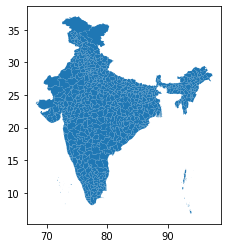

In [11]:
india_s_masters.plot()

In [12]:
##for joining two files
india_joined = india_s_masters.merge(champion,on='censuscode')
india_joined.head(2)

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,Districtname,pc11_state_name,State id,Literacy,population density,slum population,Urban population share,population,pc11_tot_area,Beds (IC),Beds (total),Care facilities (hospitals/clinics),average_age,total_cases,total_deaths,deaths per 100.000,cases per 100.000,population density2,slum share
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945...",adilabad,andhra pradesh,28.0,1483347.0,184.00331,303312.000977,0.277341,2741239.0,14897.7700,14.0,1566.7123,85.52240,27.308952,0.0,0.0,0.000000,0.000000,184.003311,0.110648
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278...",agra,uttar pradesh,9.0,2680510.0,1080.82780,533554.000000,0.458087,4418797.0,4088.3452,16.0,1052.2804,107.98638,25.197544,11831.0,182.0,4.118768,267.742555,1080.827764,0.120746


In [13]:
india_joined.loc[india_joined['ST_NM'] == 'NCT of Delhi']

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,Districtname,pc11_state_name,State id,Literacy,population density,slum population,Urban population share,population,pc11_tot_area,Beds (IC),Beds (total),Care facilities (hospitals/clinics),average_age,total_cases,total_deaths,deaths per 100.000,cases per 100.000,population density2,slum share
372,North West,NCT of Delhi,7,1,90,"POLYGON ((77.17093 28.66833, 77.16689 28.67303...",delhi (north west),NCT of Delhi,NaN,2707855.0,10354.4790,376234.050781,0.941488,3656539.0,353.13599,NaN,NaN,NaN,28.811548,83350.666667,1270.666667,34.750530,2279.496176,10354.478455,0.102893
489,South,NCT of Delhi,7,9,98,"POLYGON ((77.26455 28.60747, 77.26558 28.60738...",delhi (north east),NCT of Delhi,NaN,2078402.0,20443.7970,319397.919907,0.995537,2731929.0,133.63120,NaN,NaN,NaN,27.756417,83350.666667,1270.666667,46.511702,3050.982169,20443.796060,0.116913
492,South West,NCT of Delhi,7,8,97,"POLYGON ((77.18253 28.64817, 77.18380 28.64638...",delhi (south west),NCT of Delhi,NaN,1787689.0,8243.7803,259683.193726,0.937340,2292958.0,278.14401,NaN,NaN,NaN,27.868524,83350.666667,1270.666667,55.416046,3635.071670,8243.779904,0.113252


In [14]:
india_s_masters.loc[india_s_masters['censuscode'] == 518]

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
382,Mumbai Suburban,Maharashtra,27,22,518,"POLYGON ((72.95859 18.98734, 72.94677 18.98574..."


In [15]:
india_s_masters.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."


In [16]:
# We drop the row with the data that is unclear
india_s_masters = india_s_masters[india_s_masters['censuscode'] != 0]

In [17]:
champion.columns

Index(['censuscode', 'Districtname', 'pc11_state_name', 'State id', 'Literacy',
       'population density', 'slum population', 'Urban population share',
       'population', 'pc11_tot_area', 'Beds (IC)', 'Beds (total)',
       'Care facilities (hospitals/clinics)', 'average_age', 'total_cases',
       'total_deaths', 'deaths per 100.000', 'cases per 100.000',
       'population density2', 'slum share'],
      dtype='object')

In [18]:
columns_to_plot = champion.columns.values.tolist()
type(columns_to_plot)

for index,value in enumerate(columns_to_plot):
    print(index,value)


list

0 censuscode
1 Districtname
2 pc11_state_name
3 State id
4 Literacy
5 population density
6 slum population
7 Urban population share
8 population
9 pc11_tot_area
10 Beds (IC)
11 Beds (total)
12 Care facilities (hospitals/clinics)
13 average_age
14 total_cases
15 total_deaths
16 deaths per 100.000
17 cases per 100.000
18 population density2
19 slum share


In [19]:
# This code removes unneeded variables
if len(columns_to_plot) != 14:
    columns_to_plot = columns_to_plot[4::] 
    len(columns_to_plot)
    for index,value in enumerate(columns_to_plot):
        print(index,value)



16

0 Literacy
1 population density
2 slum population
3 Urban population share
4 population
5 pc11_tot_area
6 Beds (IC)
7 Beds (total)
8 Care facilities (hospitals/clinics)
9 average_age
10 total_cases
11 total_deaths
12 deaths per 100.000
13 cases per 100.000
14 population density2
15 slum share


In [20]:
columns_to_plot[1]

'population density'

Text(0.5, 1.0, 'Literacy')

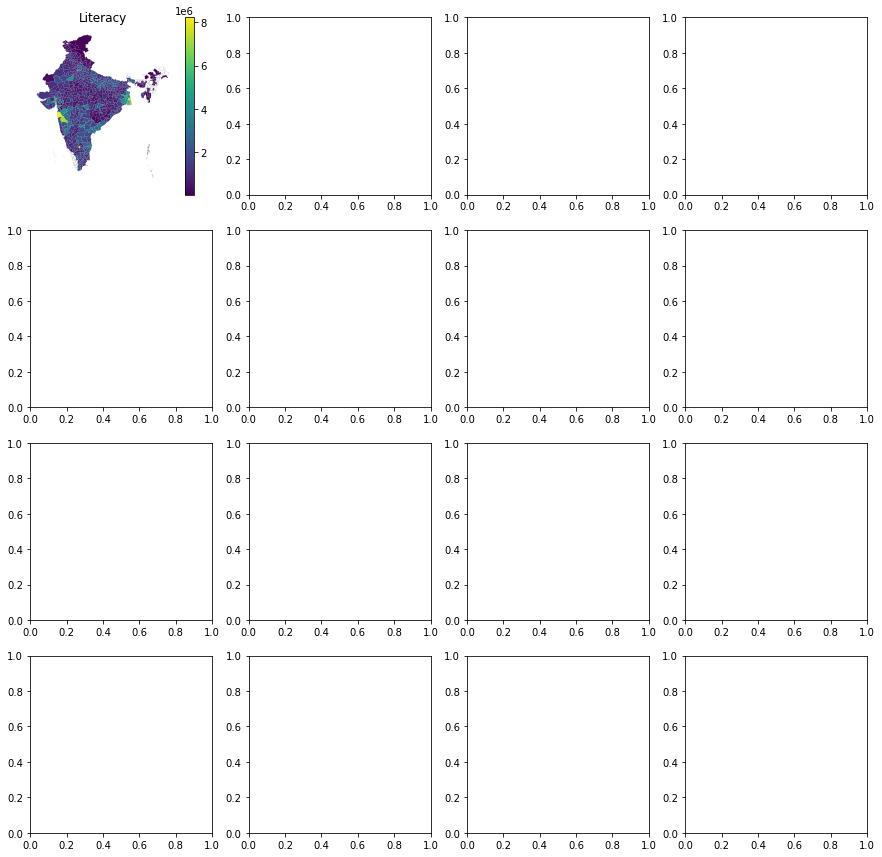

In [21]:
f, axs = plt.subplots(4,4, figsize=(15,15))
axs = axs.flatten()

#zodat de code niet zo lang runt, voor final wel columns_to_plot gebruiken
column_test= ['Literacy']

for i, col in enumerate(column_test): # hier dus columns_to_plot gebruiken
    ax = axs[i]
    plot = india_s_masters.plot(ax = ax, linewidth=0.1, alpha = 1, color = 'white', edgecolor="grey")
    plot = india_joined.plot(column=col, ax=ax, linewidth=0, cmap='viridis', alpha = 1, legend= True)
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
plt.show()

In [22]:
column = ['population density', 'cases per 100.000','deaths per 100.000']

,censuscode,cases per 100.000,deaths per 100.000
0,532,0.000000,0.000000
1,146,267.742555,4.118768
2,474,1208.467534,34.512628
3,522,2619.520910,29.120707
4,283,777.399459,2.747877
...,...,...,...
556,108,199.692861,2.096513
557,240,391.100432,1.712224
558,239,498.083644,2.577061
559,618,644.808067,9.279594


C:\Users\Arno\AppData\Local\Temp/ipykernel_2388/2555725167.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selection['perc cases'] = pd.qcut(selection['cases per 100.000'], k, labels = klist)
C:\Users\Arno\AppData\Local\Temp/ipykernel_2388/2555725167.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selection['perc deaths'] = pd.qcut(selection['deaths per 100.000'], k, labels = klist)


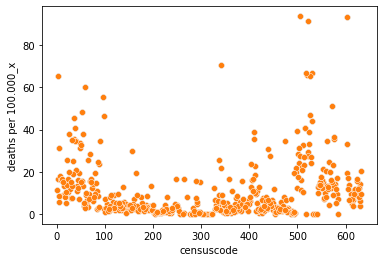

In [23]:
selection = india_joined[['censuscode','cases per 100.000','deaths per 100.000']]
#india_joined
#for some reason, this k cant be bigger than 20
k = 10
klist = list(range(1,k+1,1))
selection
selection['perc cases'] = pd.qcut(selection['cases per 100.000'], k, labels = klist)
selection['perc deaths'] = pd.qcut(selection['deaths per 100.000'], k, labels = klist)

test = pd.merge(india_joined, selection, how = 'right', on = 'censuscode')


#these hist plots show crazy outliers
scat = sns.scatterplot(data = test[['deaths per 100.000_x','censuscode']].sort_values(by = 'deaths per 100.000_x', ascending = False), x=test['censuscode'],y=test['deaths per 100.000_x'])
scat = sns.scatterplot(data = test[['cases per 100.000_x','censuscode']].sort_values(by = 'cases per 100.000_x', ascending = False), x=test['censuscode'],y=test['deaths per 100.000_x'])


test = test[test['deaths per 100.000_x'] < 20000]
test = test[test['cases per 100.000_x'] < 20000]

#test[['deaths per 100.000','cases per 100.000']]


#test[['deaths per 100.000_x','censuscode']].sort_values(by = 'deaths per 100.000_x', ascending = False)

In [24]:
print(test['cases per 100.000_x'].sort_values(ascending = False))

401    7120.553061
306    6521.234277
351    6386.451692
102    5802.228319
43     5132.945821
          ...     
212       0.000000
211       0.000000
194       0.000000
182       0.000000
0         0.000000
Name: cases per 100.000_x, Length: 561, dtype: float64


Text(0.5, 1.0, 'cases per 100.000_x')

Text(0.5, 1.0, 'deaths per 100.000_x')

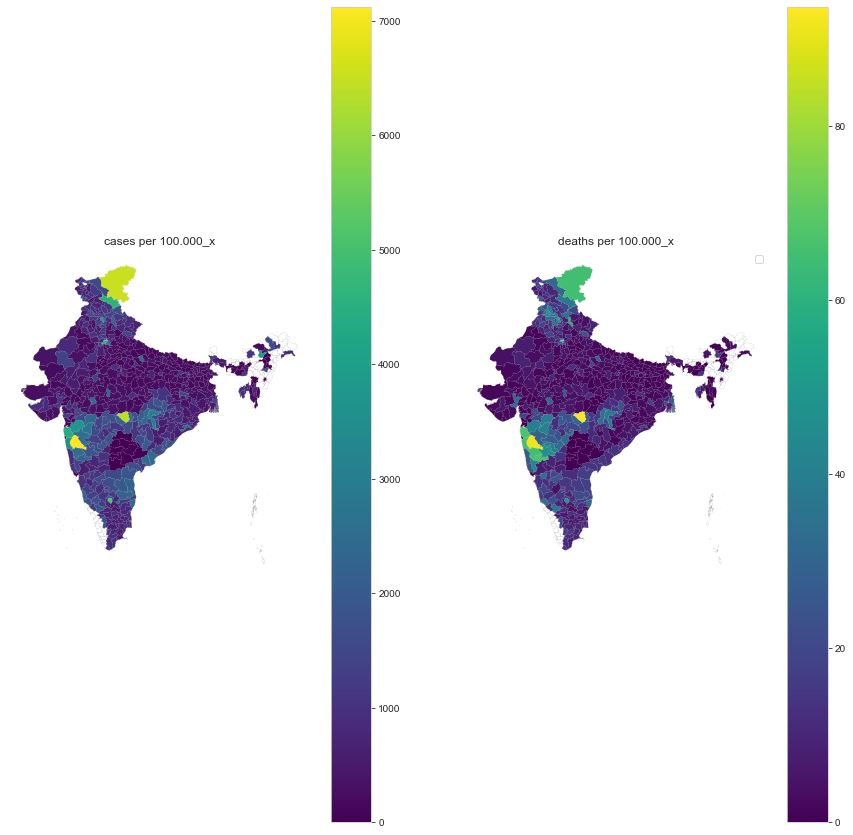

In [59]:
columns_to_plot2 = ['perc cases','perc deaths']
columns_to_plot3 = ['cases per 100.000_x', 'deaths per 100.000_x']



f, axs = plt.subplots(1,2, figsize=(15,15))
axs = axs.flatten()


for i, col in enumerate(columns_to_plot3):
    ax = axs[i]
    plot = india_s_masters.plot(ax = ax, linewidth=0.1, alpha = 1, color = 'white', edgecolor="grey")
    plot = test.plot(column=col, ax=ax, linewidth=0, cmap='viridis', alpha = 1, legend = True)
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
plot = plt.legend(labels=klist)
plt.show()

<AxesSubplot:>

Text(0.5, 1.0, 'population density')

<AxesSubplot:>

Text(0.5, 1.0, 'cases per 100.000')

<AxesSubplot:>

Text(0.5, 1.0, 'deaths per 100.000')

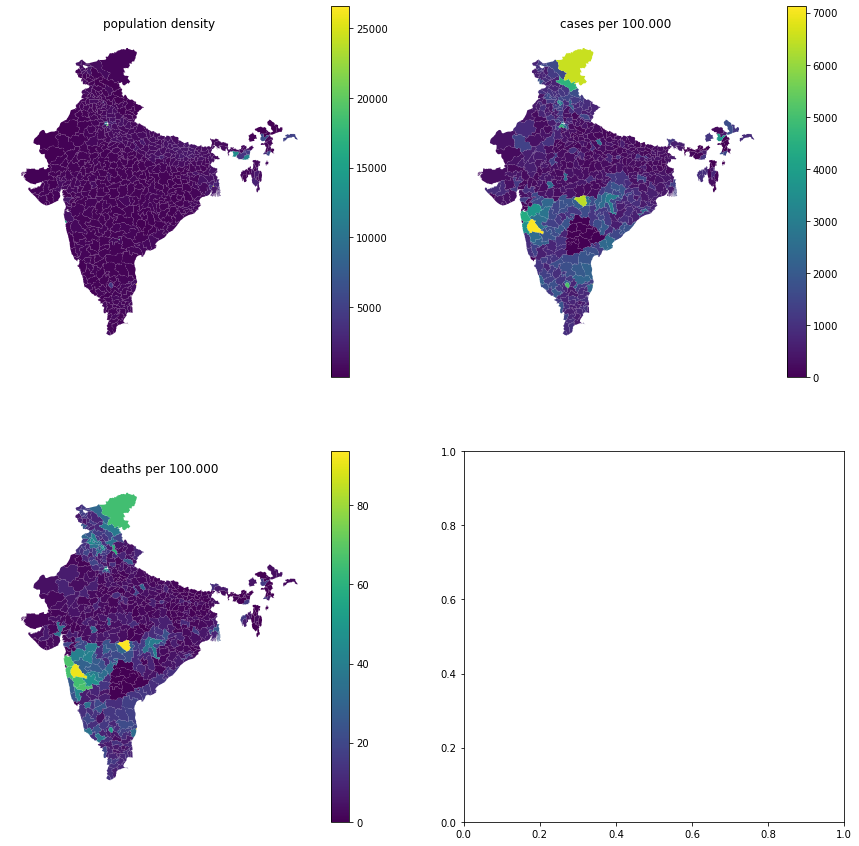

In [27]:
f, axs = plt.subplots(2,2, figsize=(15,15))
axs = axs.flatten()

for i, col in enumerate(column):
    ax = axs[i]
    india_joined.plot(column=col, ax=ax, linewidth=0, cmap='viridis', alpha = 1, legend = True)
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
plt.show()

In [28]:
india_joined.sort_values("pc11_tot_area", ascending = True).head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,Districtname,pc11_state_name,State id,Literacy,population density,slum population,Urban population share,population,pc11_tot_area,Beds (IC),Beds (total),Care facilities (hospitals/clinics),average_age,total_cases,total_deaths,deaths per 100.000,cases per 100.000,population density2,slum share
149,East Garo Hills,Meghalaya,17,2,294,"POLYGON ((91.03234 25.88749, 91.03220 25.87930...",east garo hills,meghalaya,17.0,192147.0,12955.0530,4891.0,0.139005,317917.0,24.540001,0.0,239.60149,15.806218,21.918252,459.0,3.0,0.943643,144.377306,12955.052447,0.015385
100,Changlang,Arunanchal Pradesh,12,9,253,"POLYGON ((96.90034 27.61545, 96.89734 27.61197...",changlang,arunachal pradesh,12.0,73174.0,5274.8716,0.0,0.129721,148226.0,28.100401,0.0,352.91516,22.217564,22.816780,1285.0,4.0,2.698582,866.919434,5274.871344,0.000000
383,Papum Pare,Arunanchal Pradesh,12,4,248,"POLYGON ((93.51798 27.64978, 93.55896 27.60877...",papum pare,arunachal pradesh,12.0,121048.0,6233.8218,0.0,0.549138,176573.0,28.325001,6.0,226.00000,60.207817,22.630328,6798.0,29.0,16.423802,3849.965737,6233.821492,0.000000
142,Diu,Daman & Diu,25,1,494,"MULTIPOLYGON (((70.92425 20.73850, 70.92482 20...",diu,daman diu,25.0,38058.0,1352.5714,0.0,0.460710,52074.0,38.500000,NaN,NaN,NaN,26.990053,312.0,0.0,0.000000,599.147367,1352.571429,0.000000
281,Kohima,Nagaland,13,10,270,"POLYGON ((94.35924 26.00955, 94.36322 26.00518...",kohima,nagaland,13.0,197489.0,5955.2891,15979.0,0.451841,267988.0,45.000000,28.0,419.69571,15.805193,24.237373,4044.0,21.0,7.836172,1509.022792,5955.288889,0.059626


In [29]:
# Creating a scaler so that all variables are on the same scale
scaler = MinMaxScaler()

In [30]:
print(scaler.fit(india_joined[columns_to_plot]))
#selecteren welke data we willen scalen, strings kunnen bv niet

MinMaxScaler()


In [31]:
#creating Dataframe with scaled data
india_scaled = (scaler.transform(india_joined[columns_to_plot]))

In [32]:
# Renaming the column headers
india_scaled = pd.DataFrame(india_scaled, columns= india_joined[columns_to_plot].columns)
india_scaled

,Literacy,population density,slum population,Urban population share,population,pc11_tot_area,Beds (IC),Beds (total),Care facilities (hospitals/clinics),average_age,total_cases,total_deaths,deaths per 100.000,cases per 100.000,population density2,slum share
0,0.178116,0.006800,0.077467,0.277341,0.245696,0.393887,0.015368,0.134096,0.232630,0.541872,0.000000,0.000000,0.000000,0.000000,0.006800,0.264425
1,0.324017,0.040580,0.136271,0.458087,0.397806,0.107621,0.017563,0.088494,0.295956,0.391297,0.017621,0.021092,0.043951,0.037601,0.040580,0.288559
2,0.659806,0.034257,0.065685,0.840429,0.651277,0.208616,NaN,NaN,NaN,0.676235,0.129845,0.288541,0.368280,0.169715,0.034257,0.085194
3,0.381466,0.009821,0.026685,0.200877,0.409082,0.454744,0.017563,0.119805,0.346572,0.633922,0.177248,0.153320,0.310744,0.367882,0.009821,0.054960
4,0.038847,0.067484,0.020065,0.786278,0.033435,0.005256,0.005488,0.078176,0.153603,0.530403,0.004635,0.001275,0.029322,0.109177,0.067484,0.468998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,0.087736,0.009810,0.004564,0.199518,0.118237,0.133365,0.010977,0.057437,0.111160,0.325258,0.003972,0.003245,0.022372,0.028045,0.009810,0.031976
557,0.044423,0.041451,0.000000,0.073981,0.060686,0.016163,NaN,NaN,NaN,0.276658,0.004082,0.001391,0.018271,0.054926,0.041451,0.000000
558,0.072762,0.045174,0.000844,0.120141,0.099174,0.024127,0.010977,0.023415,0.046266,0.271986,0.008348,0.003361,0.027500,0.069950,0.045174,0.007019
559,0.145170,0.025061,0.025717,0.225571,0.143707,0.063356,0.128430,0.209972,0.279621,0.746200,0.015524,0.017383,0.099021,0.090556,0.025061,0.148865


In [33]:
# Replacing the values of the variables with the scaled data
india_joined[columns_to_plot] = india_scaled[columns_to_plot]

In [34]:
india_joined.sort_values('deaths per 100.000', ascending = False).head(10)

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,Districtname,pc11_state_name,State id,Literacy,population density,slum population,Urban population share,population,pc11_tot_area,Beds (IC),Beds (total),Care facilities (hospitals/clinics),average_age,total_cases,total_deaths,deaths per 100.000,cases per 100.000,population density2,slum share
351,Nagpur,Maharashtra,27,9,505,"POLYGON ((79.51189 21.58940, 79.51674 21.58231...",nagpur,maharashtra,27.0,0.445073,0.020026,0.245157,0.683080,0.419093,0.229643,0.034029,0.241053,0.364984,0.697741,0.442637,0.505389,1.000000,0.896904,0.020026,0.492938
102,Chennai,Tamil Nadu,33,2,603,"POLYGON ((80.29769 13.12548, 80.29798 13.11914...",chennai,tamil nadu,33.0,0.457561,1.000000,0.342836,1.000000,0.418473,0.003985,NaN,NaN,NaN,0.834067,0.401554,0.502260,0.995271,0.814856,1.000000,0.690357
401,Pune,Maharashtra,27,25,521,"POLYGON ((74.83388 18.33920, 74.83266 18.32908...",pune,maharashtra,27.0,0.871371,0.021354,0.220986,0.609920,0.852135,0.437148,0.024149,0.176322,0.644609,0.624310,1.000000,1.000000,0.976509,1.000000,0.021354,0.219288
285,Kolkata,West Bengal,19,16,342,"POLYGON ((88.41075 22.55997, 88.40914 22.55744...",kolkata,west bengal,19.0,0.434632,0.915391,0.360046,1.000000,0.404869,0.004249,NaN,NaN,NaN,0.762924,0.214085,0.367134,0.751782,0.448928,0.915391,0.749203
448,Sangli,Maharashtra,27,35,531,"POLYGON ((75.60438 17.30468, 75.62316 17.29525...",sangli,maharashtra,27.0,0.247111,0.011855,0.007351,0.254897,0.253031,0.234228,0.049396,0.109775,0.223327,0.769681,0.088970,0.219261,0.715389,0.297270,0.011855,0.024373
502,Thane,Maharashtra,27,21,517,"MULTIPOLYGON (((72.87769 20.22640, 72.88886 20...",thane,maharashtra,27.0,1.000000,0.040869,0.340087,0.769852,1.000000,0.268438,0.023052,0.235789,0.853736,0.592959,0.722555,0.859196,0.715306,0.616019,0.040869,0.287716
411,Raigarh,Maharashtra,27,24,520,"POLYGON ((73.52738 19.12917, 73.52841 19.12694...",raigarh,maharashtra,27.0,0.233769,0.014154,0.008151,0.368307,0.235990,0.183294,0.013172,0.088402,0.190115,0.697698,0.141174,0.201414,0.704046,0.505348,0.014154,0.028952
454,Satara,Maharashtra,27,31,527,"POLYGON ((74.71001 18.02933, 74.69342 18.02113...",satara,maharashtra,27.0,0.268588,0.009954,0.002936,0.189889,0.269498,0.296478,0.010977,0.102866,0.232526,0.809662,0.111980,0.226909,0.695585,0.351529,0.009954,0.009146
306,Leh (ladakh),Jammu & Kashmir,1,3,3,"POLYGON ((79.38467 35.99429, 79.38682 35.99047...",leh ladakh,jammu kashmir,1.0,0.008766,0.012634,0.001983,0.342138,0.009242,0.009782,NaN,NaN,NaN,0.694680,0.012965,0.010082,0.695473,0.915833,0.012634,0.138979
126,Dehradun,Uttarakhand,5,5,60,"POLYGON ((78.01562 30.61266, 78.01621 30.60642...",dehradun,uttarakhand,5.0,0.150836,0.020556,0.049343,0.555163,0.150983,0.081164,0.015368,0.078185,0.123224,0.645512,0.053666,0.118090,0.640871,0.298252,0.020556,0.272119


<AxesSubplot:>

Text(0.5, 1.0, 'population density')

<AxesSubplot:>

Text(0.5, 1.0, 'cases per 100.000')

<AxesSubplot:>

Text(0.5, 1.0, 'deaths per 100.000')

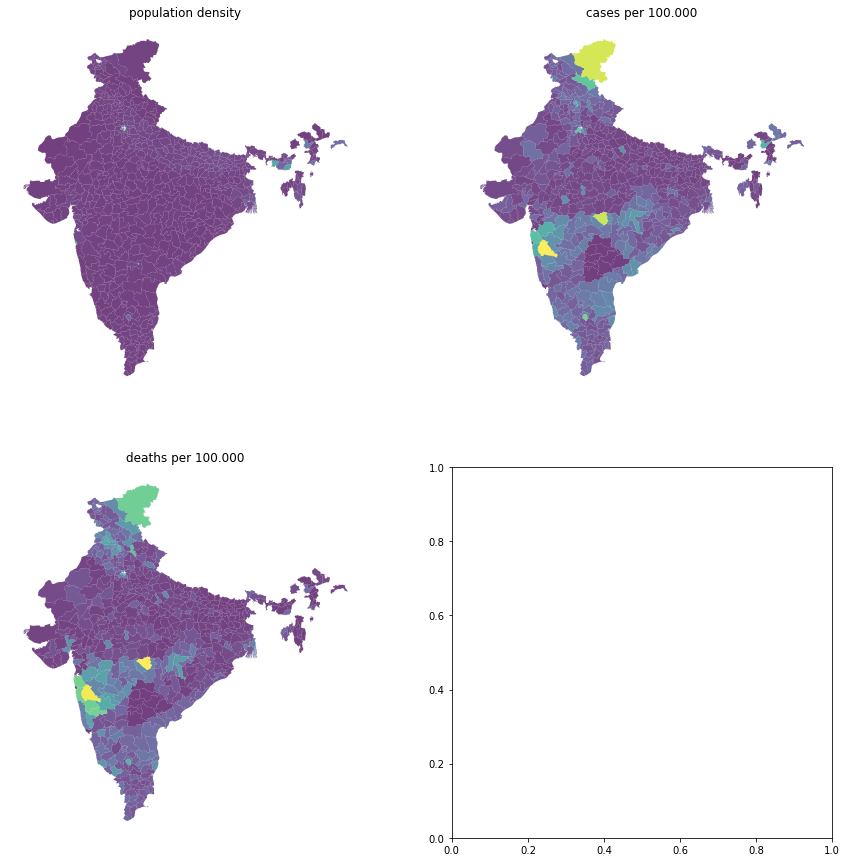

In [35]:
f, axs = plt.subplots(2,2, figsize=(15,15))
axs = axs.flatten()

for i, col in enumerate(column):
    ax = axs[i]
    india_joined.plot(column=col, ax=ax, linewidth=0, cmap='viridis', alpha = 0.75)
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
plt.show()

In [36]:
km_list1 = ['deaths per 100.000', 'cases per 100.000', 'Urban population share', 'slum share', 'average_age', 'Literacy']
india_joined[km_list1]

,deaths per 100.000,cases per 100.000,Urban population share,slum share,average_age,Literacy
0,0.000000,0.000000,0.277341,0.264425,0.541872,0.178116
1,0.043951,0.037601,0.458087,0.288559,0.391297,0.324017
2,0.368280,0.169715,0.840429,0.085194,0.676235,0.659806
3,0.310744,0.367882,0.200877,0.054960,0.633922,0.381466
4,0.029322,0.109177,0.786278,0.468998,0.530403,0.038847
...,...,...,...,...,...,...
556,0.022372,0.028045,0.199518,0.031976,0.325258,0.087736
557,0.018271,0.054926,0.073981,0.000000,0.276658,0.044423
558,0.027500,0.069950,0.120141,0.007019,0.271986,0.072762
559,0.099021,0.090556,0.225571,0.148865,0.746200,0.145170


In [37]:
india_jonko = india_joined[km_list1]
india_jonko = gpd.GeoDataFrame(india_jonko)


<AxesSubplot:>

Text(0.5, 1.0, 'deaths per 100.000')

<AxesSubplot:>

Text(0.5, 1.0, 'cases per 100.000')

<AxesSubplot:>

Text(0.5, 1.0, 'Urban population share')

<AxesSubplot:>

Text(0.5, 1.0, 'slum share')

<AxesSubplot:>

Text(0.5, 1.0, 'average_age')

<AxesSubplot:>

Text(0.5, 1.0, 'Literacy')

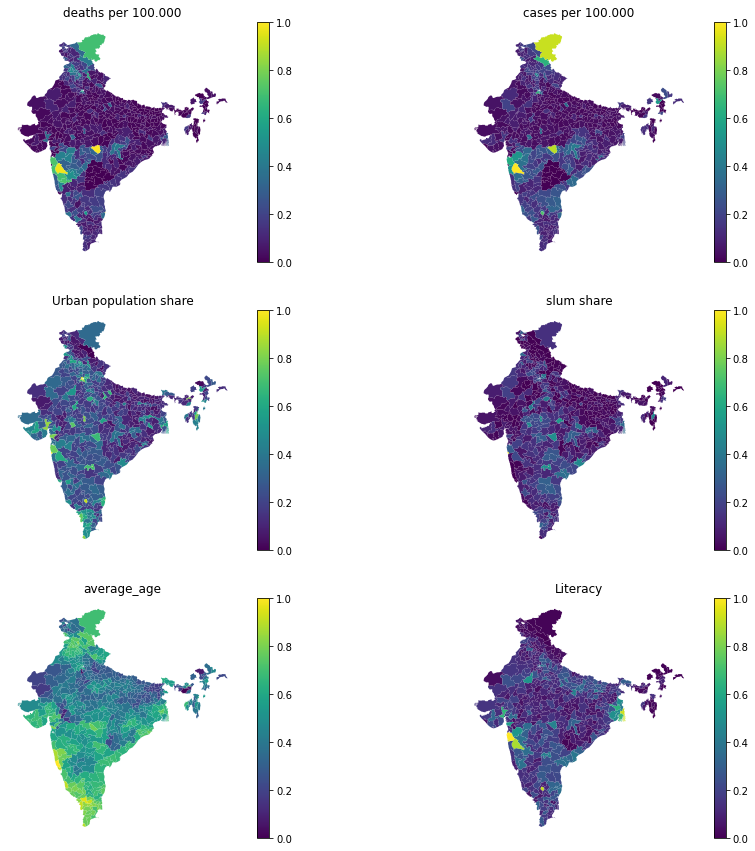

In [38]:
f, axs = plt.subplots(3,2, figsize=(15,15))
axs = axs.flatten()

for i, col in enumerate(km_list1):
    ax = axs[i]
    india_joined.plot(column=col, ax=ax, linewidth=0, cmap='viridis', alpha = 1, legend = True)
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
plt.show()

In [39]:
# Analysing how many clusters we need using the elbow method
# This method uses the point where the SSE does not decrease that much anaymore
# https://realpython.com/k-means-clustering-python/
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler

In [40]:

sse = []
for k in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(india_joined[km_list1])
    sse.append(kmeans.inertia_)
    
sse

KMeans(n_clusters=1)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

KMeans(n_clusters=10)

[75.40233667124215,
 49.01207434234095,
 39.13968288086906,
 34.484216560654396,
 30.82072735061192,
 28.01733262810651,
 25.99415573654931,
 24.511099051671547,
 23.174466027738582,
 21.98621971331786]

([<matplotlib.axis.XTick at 0x1cd47ccfd90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'SSE')

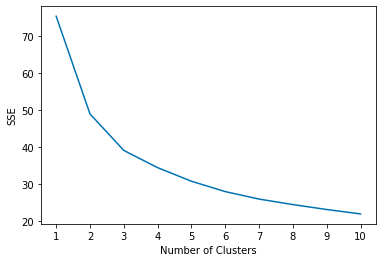

In [41]:
plt.style.use('seaborn-colorblind')
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [42]:
# The graph is not very clear so we use a Kneelocater (knik)
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

We choose to use 3 clusters for our further analyses

In [43]:
#Setting up multiple clusters
kmeans_3 = cluster.KMeans(n_clusters=3)
np.random.seed(1234)
kmeanscls1 = kmeans_3.fit(india_joined[km_list1])

In [44]:
kmeans_5 = cluster.KMeans(n_clusters=5)
np.random.seed(1234)
kmeanscls2 = kmeans_5.fit(india_joined[km_list1])

In [45]:
kmeans_7 = cluster.KMeans(n_clusters=7)
np.random.seed(1234)
kmeanscls3 = kmeans_7.fit(india_joined[km_list1])

In [46]:
kmeans_9 = cluster.KMeans(n_clusters=9)
np.random.seed(1234)
kmeanscls4 = kmeans_9.fit(india_joined[km_list1])

In [47]:
india_joined['kmeans_3'] = kmeanscls1.labels_
india_joined['kmeans_5'] = kmeanscls2.labels_
india_joined['kmeans_7'] = kmeanscls3.labels_
india_joined['kmeans_9'] = kmeanscls4.labels_

In [48]:
kmes = ['kmeans_3','kmeans_5','kmeans_7','kmeans_9']

In [49]:
kme_urb = india_joined[km_list1]
kme_urb

,deaths per 100.000,cases per 100.000,Urban population share,slum share,average_age,Literacy
0,0.000000,0.000000,0.277341,0.264425,0.541872,0.178116
1,0.043951,0.037601,0.458087,0.288559,0.391297,0.324017
2,0.368280,0.169715,0.840429,0.085194,0.676235,0.659806
3,0.310744,0.367882,0.200877,0.054960,0.633922,0.381466
4,0.029322,0.109177,0.786278,0.468998,0.530403,0.038847
...,...,...,...,...,...,...
556,0.022372,0.028045,0.199518,0.031976,0.325258,0.087736
557,0.018271,0.054926,0.073981,0.000000,0.276658,0.044423
558,0.027500,0.069950,0.120141,0.007019,0.271986,0.072762
559,0.099021,0.090556,0.225571,0.148865,0.746200,0.145170


In [50]:
kme_urb['kmeans_3'] = kmeanscls1.labels_
kme_urb

C:\Users\Arno\AppData\Local\Temp/ipykernel_2388/934937021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kme_urb['kmeans_3'] = kmeanscls1.labels_


,deaths per 100.000,cases per 100.000,Urban population share,slum share,average_age,Literacy,kmeans_3
0,0.000000,0.000000,0.277341,0.264425,0.541872,0.178116,1
1,0.043951,0.037601,0.458087,0.288559,0.391297,0.324017,1
2,0.368280,0.169715,0.840429,0.085194,0.676235,0.659806,0
3,0.310744,0.367882,0.200877,0.054960,0.633922,0.381466,1
4,0.029322,0.109177,0.786278,0.468998,0.530403,0.038847,0
...,...,...,...,...,...,...,...
556,0.022372,0.028045,0.199518,0.031976,0.325258,0.087736,2
557,0.018271,0.054926,0.073981,0.000000,0.276658,0.044423,2
558,0.027500,0.069950,0.120141,0.007019,0.271986,0.072762,2
559,0.099021,0.090556,0.225571,0.148865,0.746200,0.145170,1


In [51]:
size_of_clusters = kme_urb.groupby('kmeans_3').size()
size_of_clusters

kmeans_3
0     48
1    208
2    305
dtype: int64

In [52]:
kme_urb = kme_urb.set_index('kmeans_3')
kme_urb.head()

,deaths per 100.000,cases per 100.000,Urban population share,slum share,average_age,Literacy
kmeans_3,,,,,,
1,0.000000,0.000000,0.277341,0.264425,0.541872,0.178116
1,0.043951,0.037601,0.458087,0.288559,0.391297,0.324017
0,0.368280,0.169715,0.840429,0.085194,0.676235,0.659806
1,0.310744,0.367882,0.200877,0.054960,0.633922,0.381466
0,0.029322,0.109177,0.786278,0.468998,0.530403,0.038847


In [53]:
kme_urb = kme_urb.stack()
kme_urb.head(100)

kmeans_3                        
1         deaths per 100.000        0.000000
          cases per 100.000         0.000000
          Urban population share    0.277341
          slum share                0.264425
          average_age               0.541872
                                      ...   
          Literacy                  0.118656
0         deaths per 100.000        0.331610
          cases per 100.000         0.140012
          Urban population share    0.535847
          slum share                0.341433
Length: 100, dtype: float64

In [54]:
kme_urb = kme_urb.reset_index()
kme_urb.head()

,kmeans_3,level_1,0
0,1,deaths per 100.000,0.000000
1,1,cases per 100.000,0.000000
2,1,Urban population share,0.277341
3,1,slum share,0.264425
4,1,average_age,0.541872


In [55]:
kme_urb = kme_urb.rename({'level_1': 'Characteristics', 0:'Values'}, axis =1)
kme_urb.head()

,kmeans_3,Characteristics,Values
0,1,deaths per 100.000,0.000000
1,1,cases per 100.000,0.000000
2,1,Urban population share,0.277341
3,1,slum share,0.264425
4,1,average_age,0.541872


OSError: [Errno 22] Invalid argument: 'bumps.png'

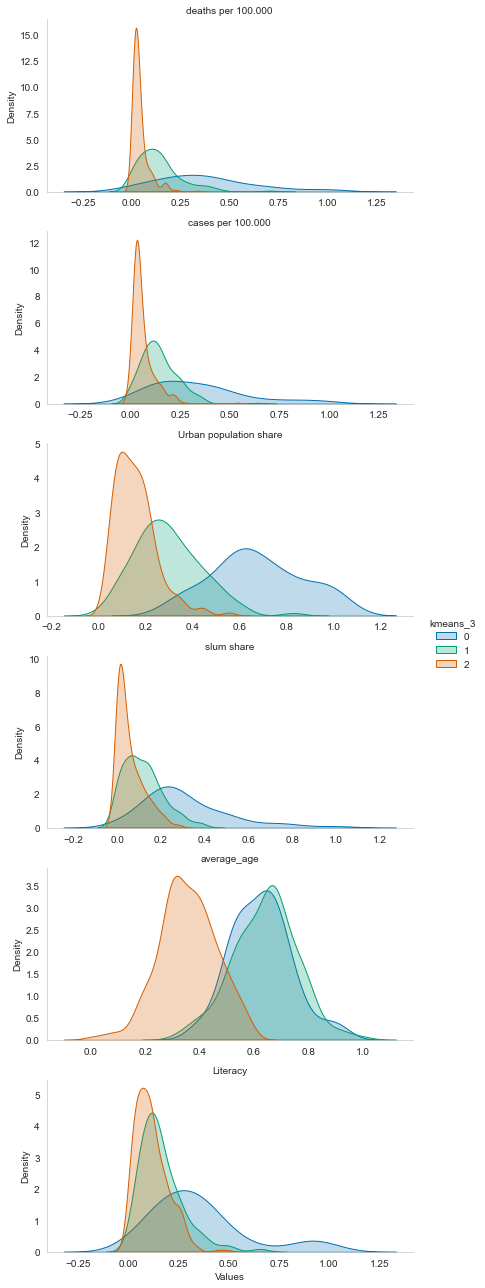

In [56]:
sns.set_style("whitegrid", {'axes.grid' : False})
facets = sns.FacetGrid(data=kme_urb, row='Characteristics', hue='kmeans_3', \
                  sharey=False, sharex=False, aspect=2)
_ = facets.map(sns.kdeplot, 'Values', shade= True).add_legend()
facets.tight_layout()
facets.set_titles(col_template = '{col_name}', row_template = '{row_name}')
facets.savefig('bumps.png')

In [ ]:
f, axs = plt.subplots(2,2, figsize=(15,15))
axs = axs.flatten()

for i, col in enumerate(kmes):
    ax = axs[i]
    india_joined.plot(column=col, categorical=True, legend=True, linewidth=1, ax=ax)
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
plt.show()
